In [1]:
import pandas as pd
data = pd.read_csv('preprocessed_dataset.csv')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

X = data.drop(columns=['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
y = data['Machine failure']

#Applying Recursive Feature Elimination with Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=log_reg, n_features_to_select=5)
rfe.fit(X, y)

selected_features_rfe = X.columns[rfe.support_]
print("Selected Features by RFE:", selected_features_rfe.tolist())



Selected Features by RFE: ['Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]', 'Tool wear [min]', 'Power[W]']


In [3]:
from sklearn.feature_selection import SelectKBest, f_classif

# ANOVA F-test to select top features
anova_selector = SelectKBest(score_func=f_classif, k='all')  
X_anova_selected = anova_selector.fit_transform(X, y)

anova_scores = anova_selector.scores_
anova_features = X.columns
selected_features_anova = anova_features[anova_selector.get_support()]
print("Selected Features by ANOVA F-test:", selected_features_anova.tolist())


Selected Features by ANOVA F-test: ['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Power[W]']


In [4]:
anova_df = pd.DataFrame({'Feature': anova_features, 'Score': anova_scores})
print(anova_df.sort_values(by='Score'))

                   Feature       Score
0                     Type   12.823482
2  Process temperature [K]   15.238324
1      Air temperature [K]   79.780270
5          Tool wear [min]  137.830279
3   Rotational speed [rpm]  243.635077
6                 Power[W]  300.979746
4              Torque [Nm]  367.703519


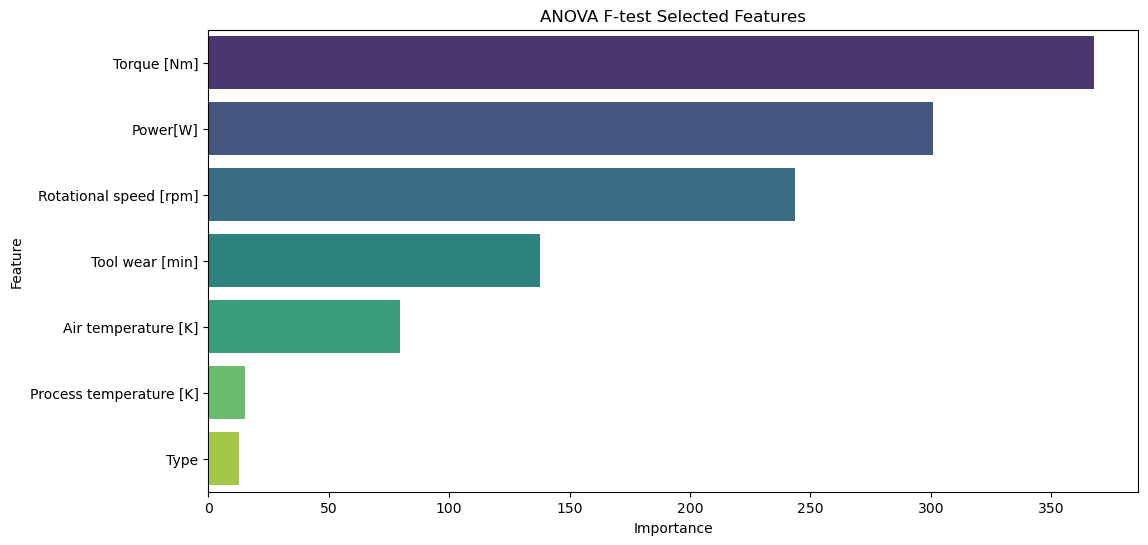

In [15]:
import matplotlib.pyplot as plt

anova_df = pd.DataFrame({'Feature': anova_features, 'Importance': anova_scores})
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=anova_df.sort_values(by='Importance', ascending=False), palette='viridis')
plt.title('ANOVA F-test Selected Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [18]:
from sklearn.feature_selection import mutual_info_classif

info_gain = mutual_info_classif(X, y)
info_gain_series = pd.Series(info_gain, index=X.columns).sort_values(ascending=False)
print("Information Gain Scores:\n", info_gain_series)

Information Gain Scores:
 Rotational speed [rpm]     0.021644
Torque [Nm]                0.020186
Power[W]                   0.014670
Tool wear [min]            0.012864
Air temperature [K]        0.009880
Process temperature [K]    0.005474
Type                       0.000000
dtype: float64


In [19]:
top_features_info_gain = info_gain_series.head(5).index.tolist()
print("Top Features by Information Gain:", top_features_info_gain)

Top Features by Information Gain: ['Rotational speed [rpm]', 'Torque [Nm]', 'Power[W]', 'Tool wear [min]', 'Air temperature [K]']


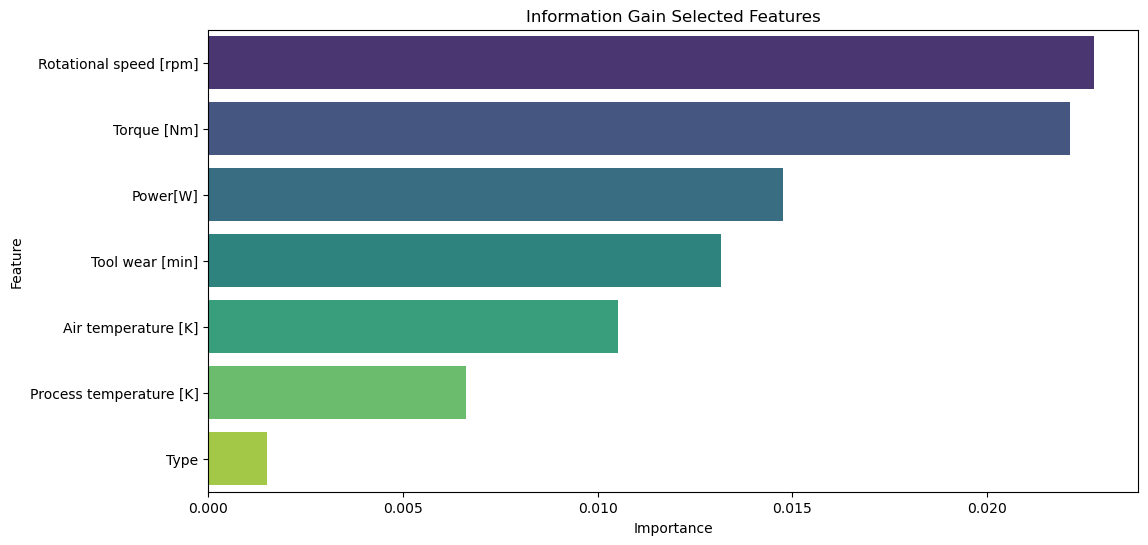

In [11]:
info_gain_df = pd.DataFrame({'Feature': X.columns, 'Importance': info_gain})

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=info_gain_df.sort_values(by='Importance', ascending=False), palette='viridis')
plt.title('Information Gain Selected Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()